# An Application To Real Data

<font size = "4">
This notebook replicates the experiments that are being discussed in section 5 of the main paper.
    
The river discharge data, here provided in the files `data_dillingen.csv`, `data_kempten.csv` and `data_lenggries.csv` in the folder `river_discharge_data` , has been downloaded from the Bavarian Environmental Agency (Bayerisches Landesamt für Umwelt, www.lfu.bayern.de) at https://www.gkd.bayern.de/en/rivers/discharge.
</font>

## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')

from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.independence_tests import ParCorr

from lpcmci import LPCMCI
from svarfci import SVARFCI

## Load And Prepare Data

In [2]:
# The measurement stations that we consider
stations = ["dillingen", "kempten", "lenggries"]

In [3]:
# Read the average daily discharges at each of these stations and combine them into a single pandas dataframe
average_discharges = None
for station in stations:
    
    new_frame = pd.read_csv("river_discharge_data/data_" + station +".csv", sep = ";", skiprows = range(10))
    new_frame = new_frame[["Datum", "Mittelwert"]]
    
    new_frame = new_frame.rename(columns = {"Mittelwert": station.capitalize(), "Datum": "Date"})
    new_frame.replace({",": "."}, regex = True, inplace = True)
    
    new_frame[station.capitalize()] = new_frame[station.capitalize()].astype(float)

    if average_discharges is None:
        average_discharges = new_frame
    else:
        average_discharges = average_discharges.merge(new_frame, on = "Date")

In [4]:
# Look at the data
average_discharges.head()

,Date,Dillingen,Kempten,Lenggries
0,2017-01-01,70.1,12.2,8.64
1,2017-01-02,64.5,12.4,8.54
2,2017-01-03,64.5,12.3,8.47
3,2017-01-04,64.4,12.0,8.45
4,2017-01-05,67.7,12.3,8.51


In [5]:
# Prepare a tigramite dataframe containing the discharge values only
var_names = [station.capitalize() for station in stations]
data = pp.DataFrame(average_discharges[var_names].values, var_names = var_names)

## Visualize The Data

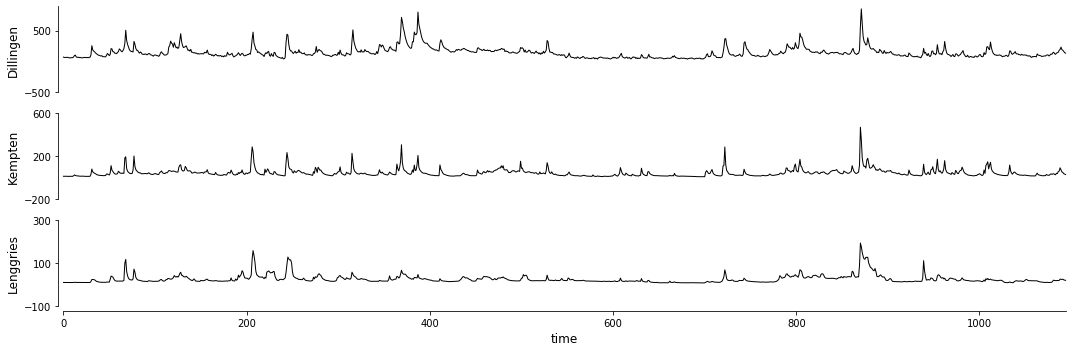

In [6]:
# Plot the prepared time series dataset
tp.plot_timeseries(data, figsize=(15, 5))
plt.show()

## LPCMCI with \\( \alpha = 0.01\\)

(0,-1) <-> (0, 0)
(0,-2) <-> (0, 0)
(1,-1) --> (0, 0)
(0, 0) <-> (1, 0)
(1,-1) --> (1, 0)
(1,-2) --> (1, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


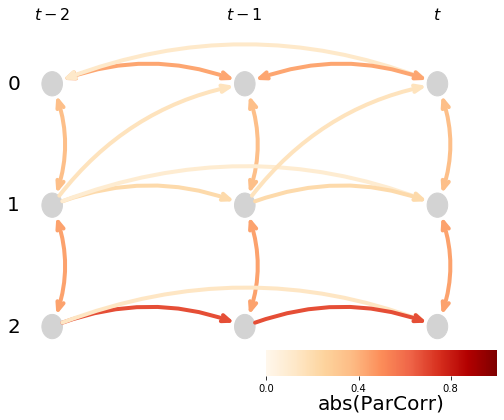

In [7]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01
n_preliminary_iterations = 0

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


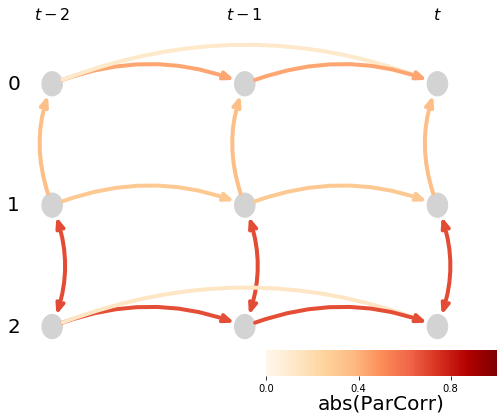

In [8]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01
n_preliminary_iterations = 1

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


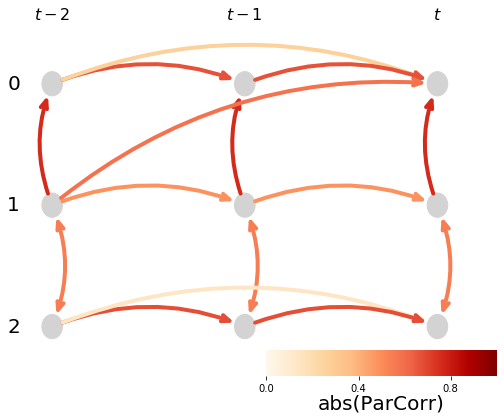

In [9]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01
n_preliminary_iterations = 2

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


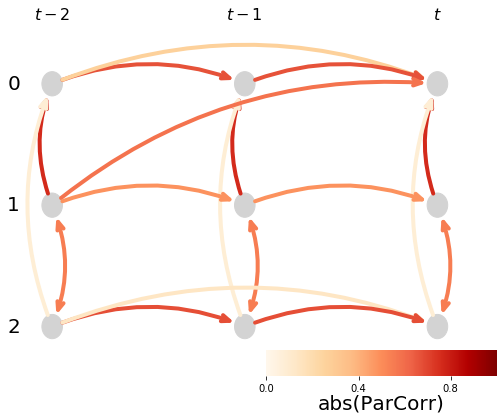

In [10]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01
n_preliminary_iterations = 3

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


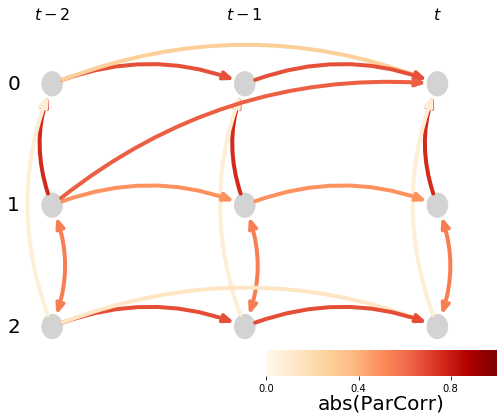

In [11]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01
n_preliminary_iterations = 4

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

## LPCMCI with \\( \alpha = 0.05\\)

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(2,-1) <-> (1, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


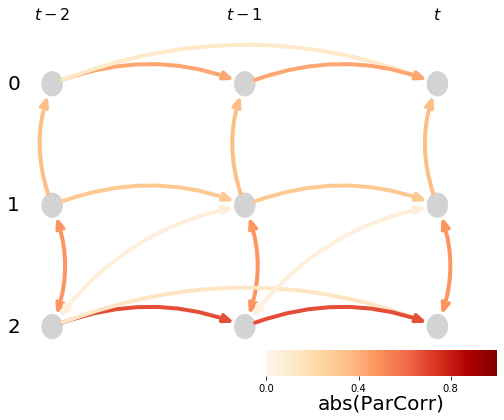

In [12]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05
n_preliminary_iterations = 0

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(2,-1) <-> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


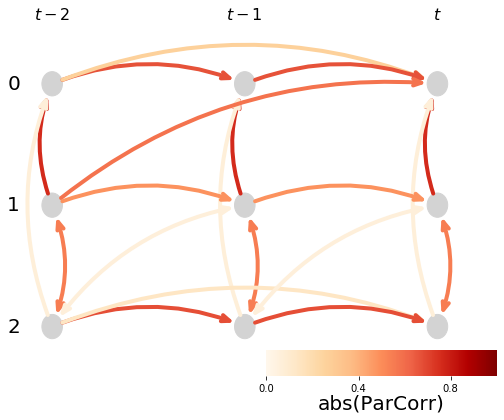

In [13]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05
n_preliminary_iterations = 1

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(2,-1) <-> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


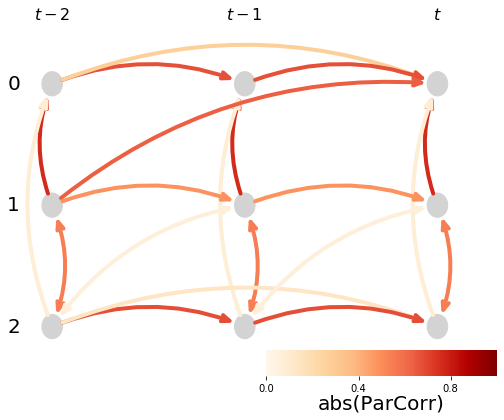

In [14]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05
n_preliminary_iterations = 2

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(2,-1) <-> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


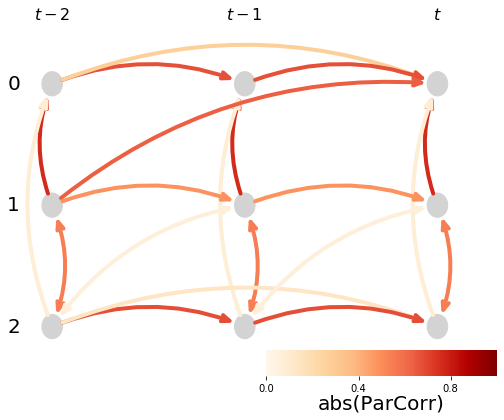

In [15]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05
n_preliminary_iterations = 3

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0,-2) --> (0, 0)
(1,-2) --> (0, 0)
(0, 0) <-- (1, 0)
(1,-1) --> (1, 0)
(2,-1) <-> (1, 0)
(0, 0) <-- (2, 0)
(1, 0) <-> (2, 0)
(2,-1) --> (2, 0)
(2,-2) --> (2, 0)


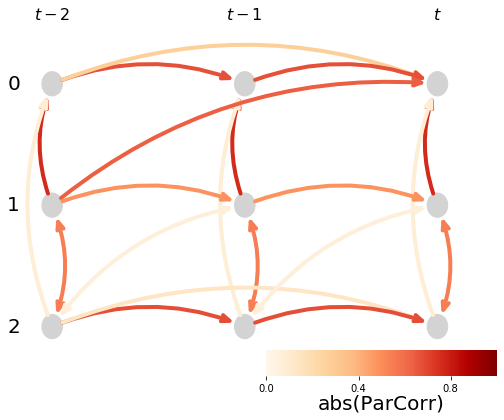

In [16]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05
n_preliminary_iterations = 4

# Run LPCMCI with these settings and the ParCorr CI test
lpcmci = LPCMCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = lpcmci.run_lpcmci(tau_max = tau_max,
                            pc_alpha = pc_alpha,
                            n_preliminary_iterations = n_preliminary_iterations,
                            verbosity = 0)

# Plot results
lpcmci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = lpcmci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

## SVAR-FCI for various \\( \alpha\\)

(0,-1) --> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


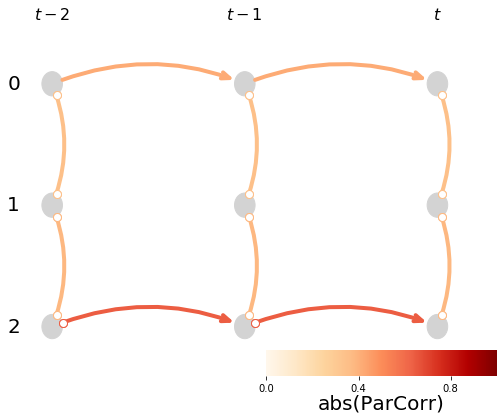

In [17]:
# Parameter settings
tau_max = 2
pc_alpha = 0.01

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


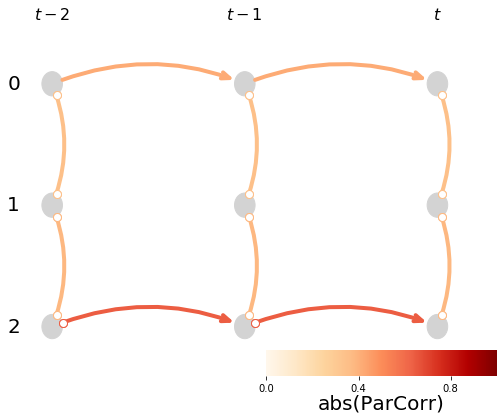

In [18]:
# Parameter settings
tau_max = 2
pc_alpha = 0.03

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)
(2,-2) o-> (2, 0)


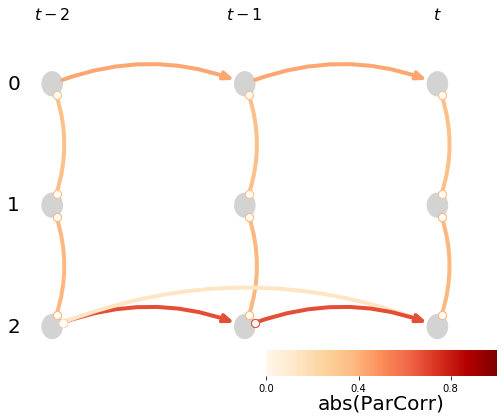

In [19]:
# Parameter settings
tau_max = 2
pc_alpha = 0.05

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)
(2,-2) o-> (2, 0)


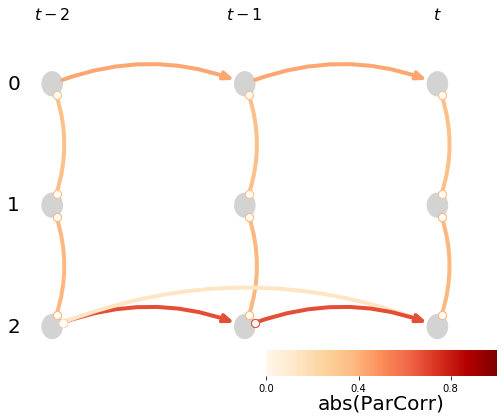

In [20]:
# Parameter settings
tau_max = 2
pc_alpha = 0.08

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) --> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


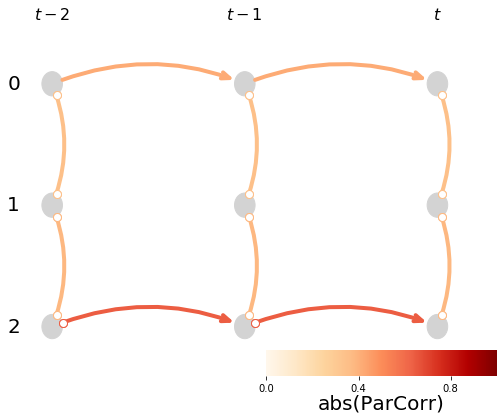

In [21]:
# Parameter settings
tau_max = 2
pc_alpha = 0.10

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) o-> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


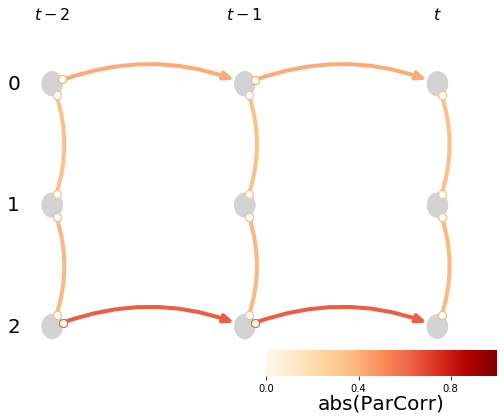

In [22]:
# Parameter settings
tau_max = 2
pc_alpha = 0.30

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) o-> (0, 0)
(0, 0) o-o (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


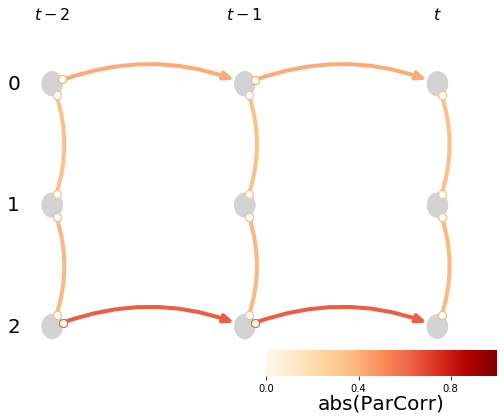

In [23]:
# Parameter settings
tau_max = 2
pc_alpha = 0.50

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()

(0,-1) o-> (0, 0)
(1,-2) o-> (0, 0)
(0, 0) <-o (1, 0)
(1,-1) o-> (1, 0)
(2,-1) o-> (1, 0)
(1, 0) o-o (2, 0)
(2,-1) o-> (2, 0)


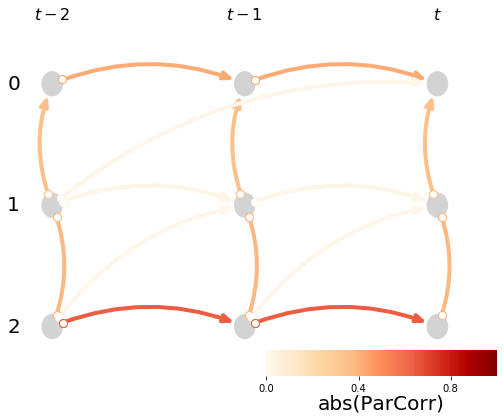

In [24]:
# Parameter settings
tau_max = 2
pc_alpha = 0.80

# Run LPCMCI with these settings and the ParCorr CI test
svarfci = SVARFCI(dataframe = data, cond_ind_test = ParCorr())
link_matrix = svarfci.run_svarfci(tau_max = tau_max,
                                  pc_alpha = pc_alpha,
                                  verbosity = 0)

# Plot results
svarfci._print_graph_dict()
tp.plot_time_series_graph(link_matrix = link_matrix,
                          val_matrix = svarfci.val_min_matrix,
                          figsize = (8, 6),
                          link_colorbar_label = 'abs(ParCorr)',
                          vmin_edges = 0,
                          cmap_edges = plt.cm.get_cmap('OrRd'),
                          label_fontsize = 20)
plt.show()